<h1> Deep Learning Seminar 1</h1>

Credit cs231n.stanford.edu

<h2 align="center">What was at Lecture?</h2>

- Image Classification 

<img src="img/img-clf.png" width="600">

- Linear Models (Что делает линейная модель простым языком)

<img src="img/lm.png" width="600">
<img src="img/lm-int.png" width="600">

- Fully Connected Neural Nets

<img src="img/fc-net.png" width="600">

- Convolution Neural Nets (Какая мотивация при переходе к сверткам?)

<img src="img/conv.png" width="600">

- Зачем нужен backprop? 

<img src="img/bp.png" width="600">

The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive derivative of loss with respect to outputs and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```


- Что нужно накрутить на SGD чтобы получить хорошие методы стах оптимизации?

<img src="img/adam.png" width="600">

<h2 align="center">BackProp and Optimizers</h2>

In [3]:
import numpy as np
from scipy.optimize import check_grad
from gradient_check import eval_numerical_gradient_array

def rel_error(x, y):
      return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

<h3>Grad Check</h3>

<img src="img/gc.png" width="600">

<h3>Softmax Loss Layer</h3>
<img src="img/loss.png" width="300">
<img src="img/log.png" width="600">

In [60]:
 def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth class
    for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
    0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    probs = np.exp(x - np.max(x, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    N = x.shape[0]
    eps = 1e-8
    loss = -np.sum(np.log(probs[np.arange(N), y] + eps)) / N

    dx = probs.copy()
    dx[np.arange(N), y] -= 1
    dx /= N
    return loss, dx

In [61]:
y = np.random.randint(0, 3, 10)
dx = lambda x: softmax_loss(x.reshape((10, 3)), y)[1].reshape(-1)
loss = lambda x: softmax_loss(x.reshape((10, 3)), y)[0]

In [51]:
print 'loss is a scalar\n', loss(np.random.random((10, 3)))

loss is a scalar
1.14194659231


In [52]:
print 'gradient is a matrix with shape 10x3\n', dx(np.random.random((10, 3)))

gradient is a matrix with shape 10x3
[ 0.03491482  0.0333956  -0.06831042  0.03047965  0.04580841 -0.07628807
  0.02213528 -0.07446436  0.05232907  0.03530645 -0.06458656  0.02928011
  0.04054461 -0.06266242  0.02211781  0.03118431 -0.0703896   0.03920529
  0.0302208  -0.07148604  0.04126525 -0.05965338  0.03647996  0.02317342
 -0.06878958  0.02024747  0.04854211  0.02234013  0.05394509 -0.07628522]


In [53]:
print 'difference should be ~10e-8', check_grad(loss, dx, np.random.random((10, 3)).reshape(-1))

difference should be ~10e-8 3.62557041388e-08


<h3>Dense Layer</h3>
<img src="img/lin.png" width="300">

In [15]:
def affine_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    
    #############################################################################
    # TODO: Implement the affine forward pass. Store the result in out. You     #
    # will need to reshape the input into rows.                                 #
    #############################################################################
    N = x.shape[0]
    _x = x.reshape((N, -1)) # reshape the input into rows
    #print _x
    out = _x.dot(w) + b
    cache = (x, w, b)
    return out, cache

In [16]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around 1e-9.
print 'Testing affine_forward function:'
print 'difference: ', rel_error(out, correct_out)

Testing affine_forward function:
difference:  9.76984946819e-10


In [21]:
def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
    - x: Input data, of shape (N, d_1, ... d_k)
    - w: Weights, of shape (D, M)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx, dw, db = None, None, None
    #############################################################################
    # TODO: Implement the affine backward pass.                                 #
    #############################################################################
    N = x.shape[0]
    D = np.prod(x.shape[1:]) # D = d_1 * ... * d_k
    x2 = x.reshape((N, D))

    dx2 = np.dot(dout, w.T)
    dw = np.dot(x2.T, dout)
    db = np.dot(dout.T, np.ones(N))

    dx = dx2.reshape(x.shape)
    return dx, dw, db

In [22]:
# Test the affine_backward function

x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around 1e-10
print 'Testing affine_backward function:'
print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

Testing affine_backward function:
dx error:  4.50319397853e-10
dw error:  6.65351379505e-11
db error:  1.31495834311e-11


<h3>ReLu Layer</h3>

$$ReLu(x) = max(0, x)$$

In [42]:
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    #############################################################################
    # TODO: Implement the ReLU forward pass.                                    #
    #############################################################################
    out = (x > 0) * x # if x_i < 0 then 0 else x_i
    #print out
    cache = x
    return out, cache

In [43]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be around 1e-8
print 'Testing relu_forward function:'
print 'difference: ', rel_error(out, correct_out)

Testing relu_forward function:
difference:  4.99999979802e-08


In [44]:
def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    dx, x = None, cache
    #############################################################################
    # TODO: Implement the ReLU backward pass.                                   #
    #############################################################################
    dx = dout * (x >= 0)
    dx = dx.reshape(*x.shape)
    return dx

In [45]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be around 1e-12
print 'Testing relu_backward function:'
print 'dx error: ', rel_error(dx_num, dx)

Testing relu_backward function:
dx error:  3.27562862803e-12


<h3>Two Layer Fully Connected Neural Net with SGD</h3>

In [58]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%pylab inline

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Populating the interactive namespace from numpy and matplotlib


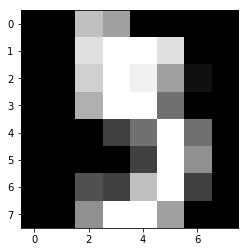

In [59]:
pylab.imshow(X[5].reshape((8, 8)), cmap='gray')

In [56]:
W1, b1 = np.random.random((64, 100)), np.random.random(100)
W2, b2 = np.random.random((100, 10)), np.random.random(10)

lr = 1e-4

for i in range(50000):
    batch_index = np.random.randint(0, X_train.shape[0], 100)
    batch_X, batch_y = X_train[batch_index], y_train[batch_index]
    
    # ------------ Train ----------------- 
    # Forward Pass
    out1, cache1 = affine_forward(batch_X, W1, b1) # Dense Layer
    out2, cache2 = relu_forward(out1)              # ReLu Layer
    out3, cache3 = affine_forward(out2,    W2, b2) # Dense Layer 
    tr_loss, dx = softmax_loss(out3, batch_y)      # Loss Layer 
    
    # Backward Pass
    dx, dW2, db2 = affine_backward(dx, cache3)
    dx = relu_backward(dx, cache2)
    dx, dW1, db1 = affine_backward(dx, cache1)
    
    # Updates
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1
    
    # ------------ Test ----------------- 
    # Forward Pass
    out1, cache1 = affine_forward(X_test, W1, b1) # Dense Layer
    out2, cache2 = relu_forward(out1)              # ReLu Layer
    out3, cache3 = affine_forward(out2,    W2, b2) # Dense Layer 
    te_loss, dx = softmax_loss(out3, y_test)         # Loss Layer
    
    # Predict
    probs = np.exp(out3 - np.max(out3, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    y_pred = np.argmax(probs, axis=1)
    
    if i % 1000 == 0:
        print 'epoch %s:' % i, 
        print '\t tr_loss %.2f' % tr_loss,
        print '\t te_loss %.2f' % te_loss,
        print '\t te_acc %s' % accuracy_score(y_pred, y_test)

epoch 0: 	 tr_loss 16.58 	 te_loss 16.65 	 te_acc 0.0944444444444
epoch 1000: 	 tr_loss 3.23 	 te_loss 3.49 	 te_acc 0.701851851852
epoch 2000: 	 tr_loss 1.80 	 te_loss 2.21 	 te_acc 0.803703703704
epoch 3000: 	 tr_loss 1.63 	 te_loss 1.26 	 te_acc 0.859259259259
epoch 4000: 	 tr_loss 1.10 	 te_loss 1.13 	 te_acc 0.875925925926
epoch 5000: 	 tr_loss 0.47 	 te_loss 0.94 	 te_acc 0.898148148148
epoch 6000: 	 tr_loss 0.77 	 te_loss 0.92 	 te_acc 0.901851851852
epoch 7000: 	 tr_loss 0.64 	 te_loss 0.97 	 te_acc 0.905555555556
epoch 8000: 	 tr_loss 0.48 	 te_loss 0.83 	 te_acc 0.905555555556
epoch 9000: 	 tr_loss 0.10 	 te_loss 0.98 	 te_acc 0.9
epoch 10000: 	 tr_loss 0.43 	 te_loss 0.96 	 te_acc 0.901851851852
epoch 11000: 	 tr_loss 0.77 	 te_loss 0.96 	 te_acc 0.914814814815
epoch 12000: 	 tr_loss 0.10 	 te_loss 0.68 	 te_acc 0.924074074074
epoch 13000: 	 tr_loss 0.87 	 te_loss 0.83 	 te_acc 0.909259259259
epoch 14000: 	 tr_loss 0.30 	 te_loss 0.68 	 te_acc 0.92037037037
epoch 15000: 	 tr

<h2 align="center">What is the challenge? </h2>

You will see in Assignment 1:
- more layers and architectures (Dropout, Convolution, Pooling)
- optimization (Momentum, Adam)
- weight initialization 
- data augmentation 
- ...

<img src="img/rw.png" width="900">